In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\vyshn\Downloads\Apple-Fitness-Data.csv')

In [3]:
print(data.head())

         Date       Time  Step Count  Distance  Energy Burned  \
0  2023-03-21  16:01:23           46   0.02543         14.620   
1  2023-03-21  16:18:37          645   0.40041         14.722   
2  2023-03-21  16:31:38           14   0.00996         14.603   
3  2023-03-21  16:45:37           13   0.00901         14.811   
4  2023-03-21  17:10:30           17   0.00904         15.153   

   Flights Climbed  Walking Double Support Percentage  Walking Speed  
0                3                              0.304          3.060  
1                3                              0.309          3.852  
2                4                              0.278          3.996  
3                3                              0.278          5.040  
4                3                              0.281          5.184  


look if this data contains any null values or not:



In [4]:
data.isna().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

analyzing my step count over time:



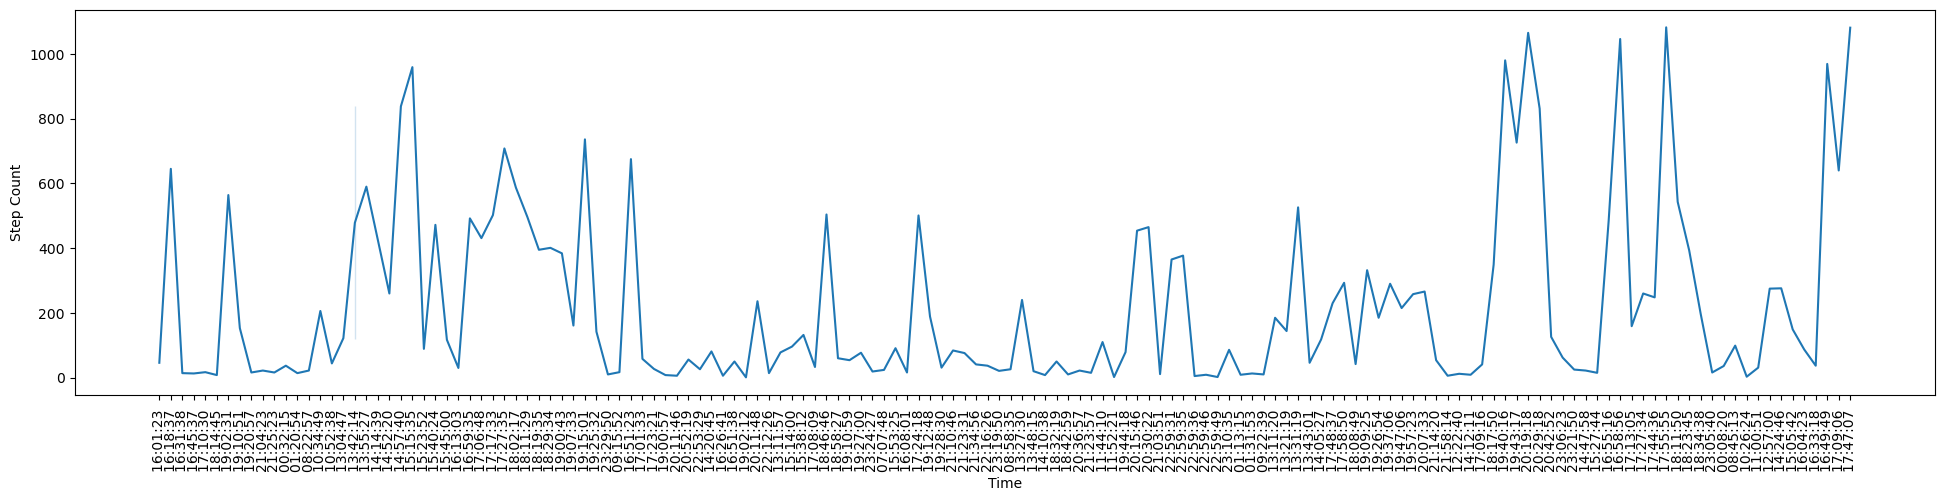

In [5]:
plt.figure(figsize=(24,5))
sns.lineplot(data=data, x='Time', y='Step Count')
plt.xticks(rotation=90);

distance covered over time:



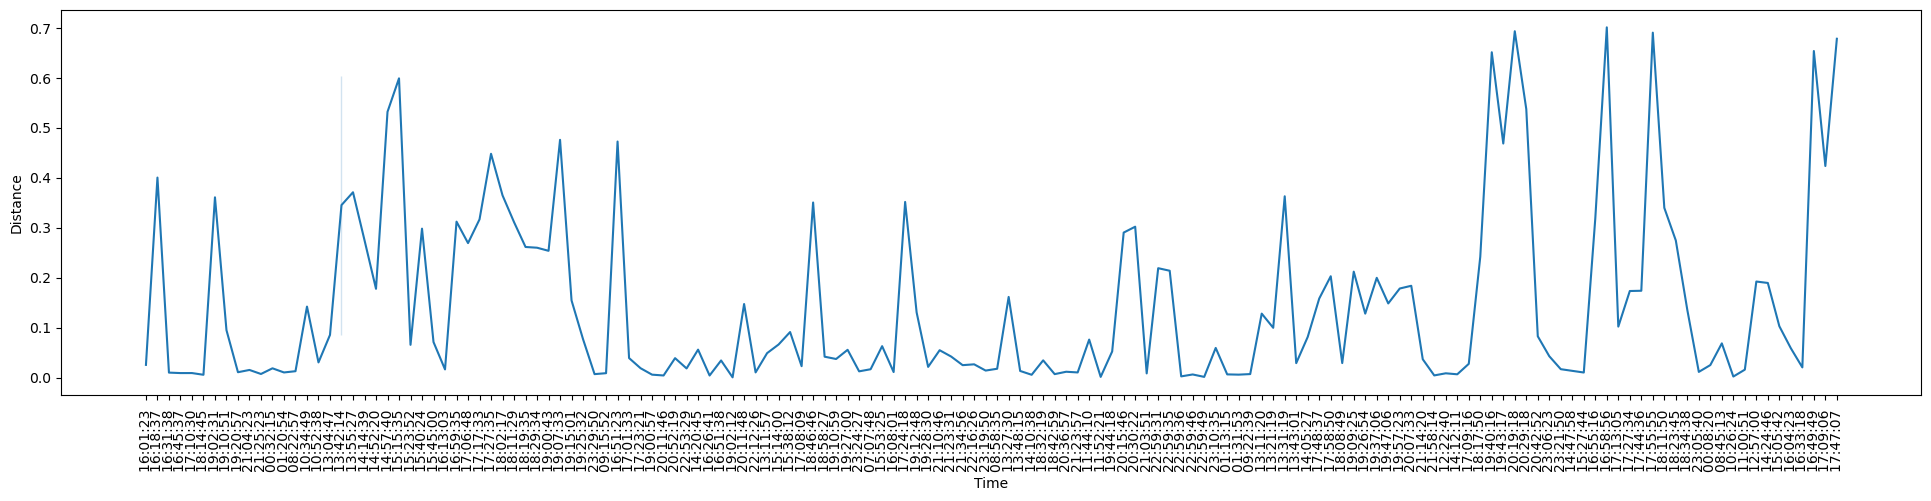

In [6]:
plt.figure(figsize=(24,5))
sns.lineplot(data=data, x='Time', y='Distance')
plt.xticks(rotation=90);

my energy burned over time:



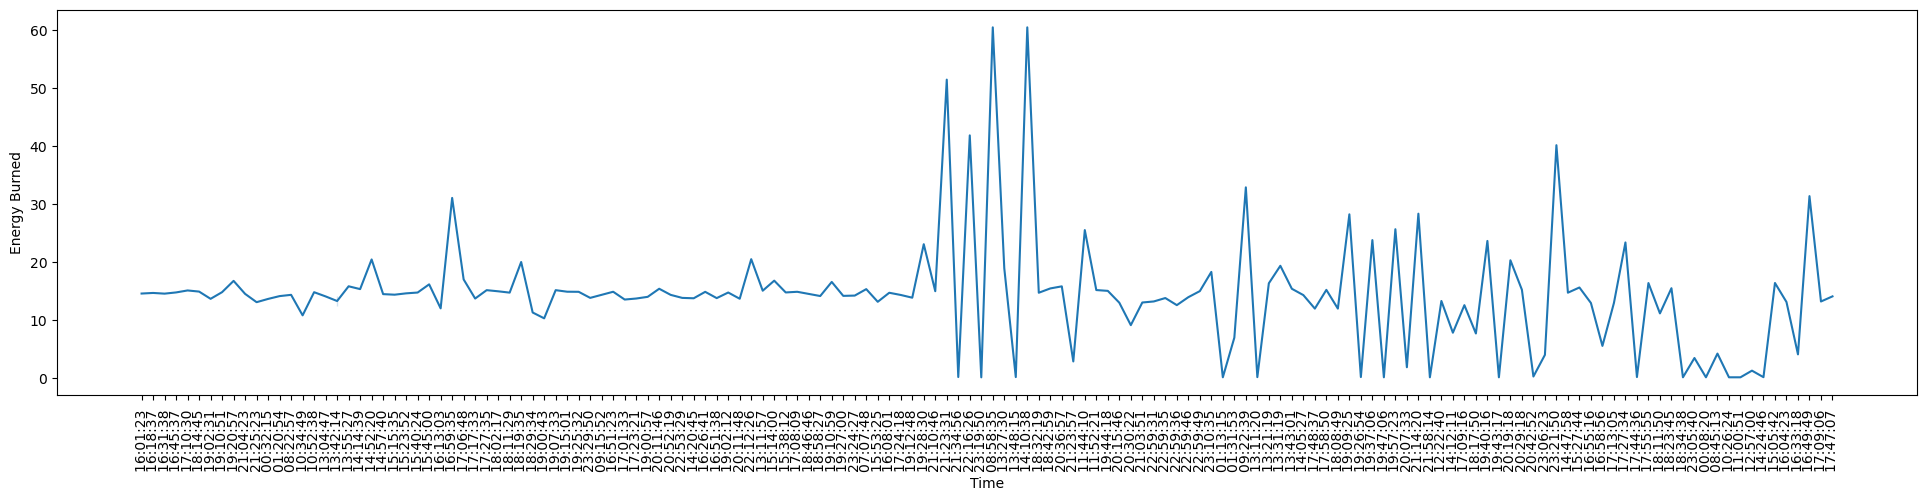

In [7]:
plt.figure(figsize=(24,5))
sns.lineplot(data=data, x='Time', y='Energy Burned')
plt.xticks(rotation=90);

my walking speed over time:



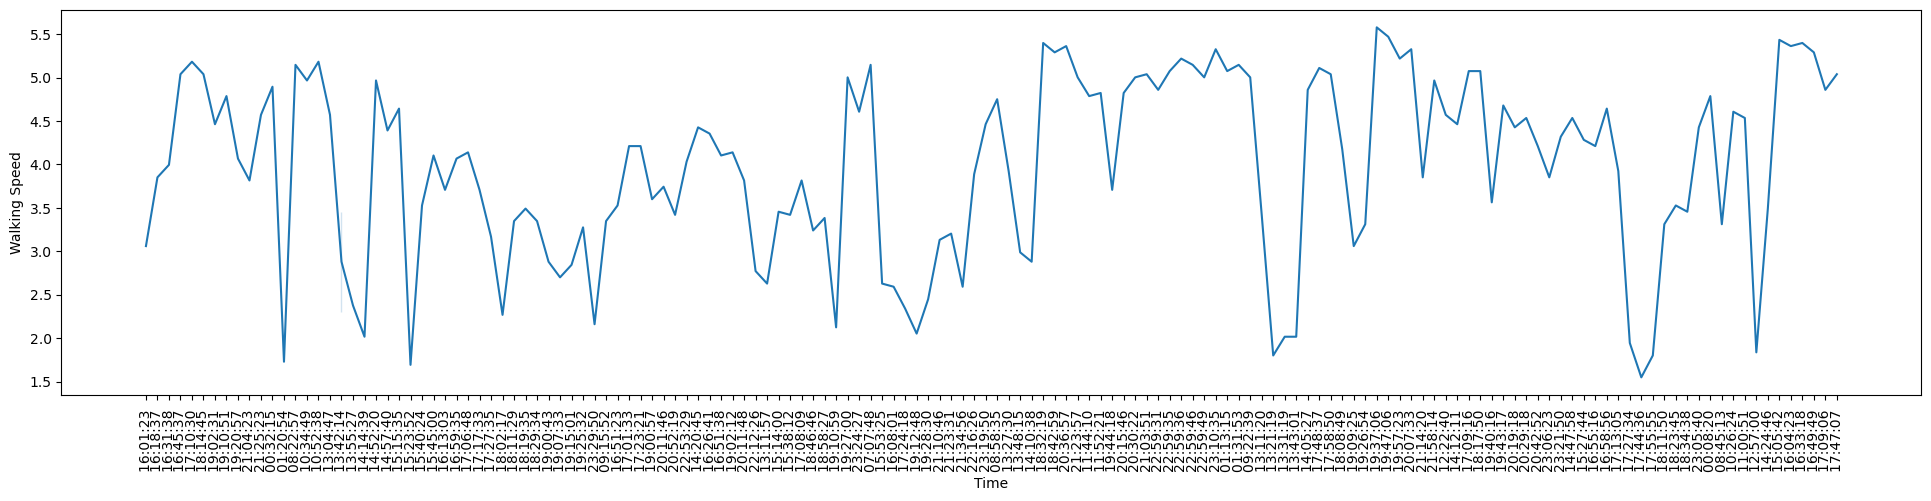

In [8]:
plt.figure(figsize=(24,5))
sns.lineplot(data=data, x='Time', y='Walking Speed')
plt.xticks(rotation=90);

calculate and look at the average step counts per day:



In [9]:
average_step_count_per_day = data.groupby('Date')['Step Count'].mean().reset_index()

In [10]:
average_step_count_per_day

,Date,Step Count
0,2023-03-21,137.636364
1,2023-03-22,354.233333
2,2023-03-23,109.125000
3,2023-03-24,64.666667
4,2023-03-25,117.000000
5,2023-03-26,101.000000
6,2023-03-27,48.875000
7,2023-03-28,163.750000
8,2023-03-29,169.578947
9,2023-03-30,384.181818


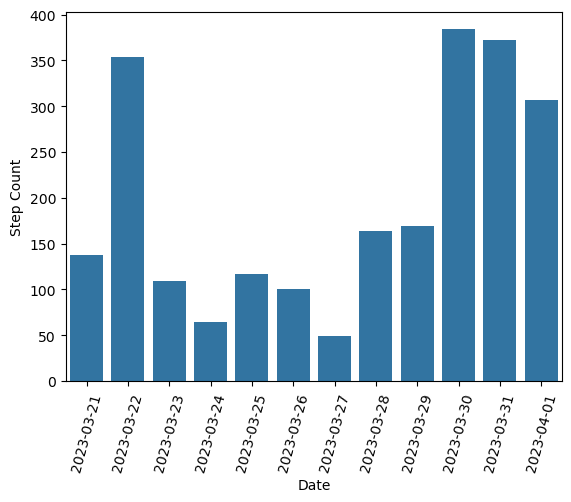

In [11]:
sns.barplot(average_step_count_per_day, x='Date', y='Step Count')
plt.xticks(rotation=75);

my walking efficiency over time:



In [12]:
data['walking_efficiency'] = data['Distance'] / data['Step Count']

In [13]:
data['walking_efficiency']

0      0.000553
1      0.000621
2      0.000711
3      0.000693
4      0.000532
         ...   
144    0.000675
145    0.000551
146    0.000675
147    0.000662
148    0.000628
Name: walking_efficiency, Length: 149, dtype: float64

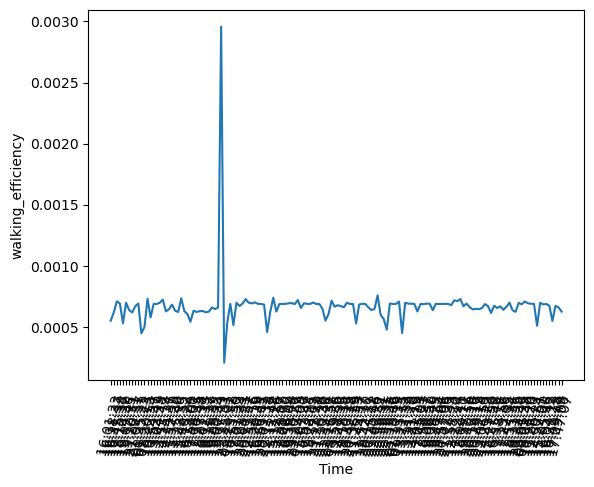

In [14]:
sns.lineplot(data, x='Time', y='walking_efficiency')
plt.xticks(rotation=75);

step count and walking speed variations by time intervals:



In [15]:
data['time_interval'] = pd.cut(pd.to_datetime(data['Time']).dt.hour,
                              bins=[0,12,18,24],
                               labels=['Mornings', 'Afternoon', 'Evening'],
                               right=False)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_7904\4235684744.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time_interval'] = pd.cut(pd.to_datetime(data['Time']).dt.hour,


<Axes: xlabel='Step Count', ylabel='Walking Speed'>

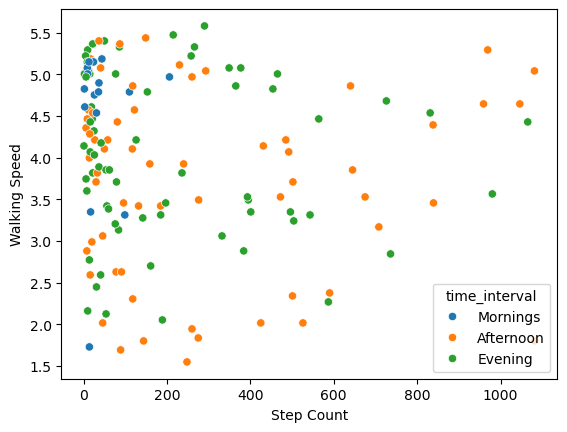

In [16]:
sns.scatterplot(data, x='Step Count', y='Walking Speed', hue='time_interval')

compare the daily average of all the health and fitness metrics (Excluding Step count):


In [17]:
daily_average = data.groupby('Date')[['Step Count','Distance', 'Energy Burned', 'Flights Climbed',
                                       'Walking Double Support Percentage', 'Walking Speed' ]].mean().reset_index()

daily_average

,Date,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,137.636364,0.086225,14.721273,2.909091,0.294273,4.352727
1,2023-03-22,354.233333,0.230261,15.158233,2.466667,0.310467,3.502800
2,2023-03-23,109.125000,0.075796,14.303000,2.375000,0.312375,3.762000
3,2023-03-24,64.666667,0.042067,15.268667,2.666667,0.307333,3.936000
4,2023-03-25,117.000000,0.080747,15.060222,2.555556,0.297778,3.520000
5,2023-03-26,101.000000,0.068760,18.504091,2.000000,0.291000,3.135273
6,2023-03-27,48.875000,0.032664,23.656625,2.000000,0.284625,4.450500
7,2023-03-28,163.750000,0.102727,14.853917,4.000000,0.300417,4.902000
8,2023-03-29,169.578947,0.115884,13.363737,1.684211,0.298842,4.234737
9,2023-03-30,384.181818,0.252494,13.236909,2.545455,0.293182,4.434545


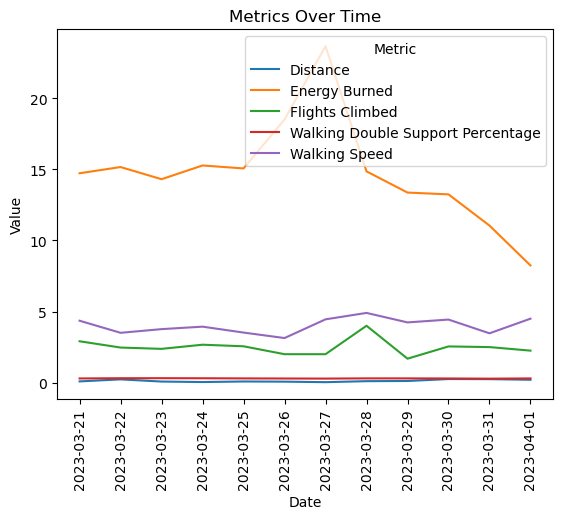

In [18]:
# Melt the DataFrame to plot multiple y values in one figure
melted_data = daily_average.melt(id_vars='Date', 
                                 value_vars=['Distance', 'Energy Burned', 
                                             'Flights Climbed', 'Walking Double Support Percentage', 
                                             'Walking Speed'],
                                 var_name='Metric', value_name='Value')

# Plot using lineplot
sns.lineplot(data=melted_data, x='Date', y='Value', hue='Metric')
plt.title('Metrics Over Time')
plt.xticks(rotation=90);